In [178]:
#import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk


In [179]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


know your data :
    - shape of the datasets  -----------> (37249,2)
    - all columns name -----------------> ('clean_comment' , 'category')
    


In [180]:
df.columns

Index(['clean_comment', 'category'], dtype='object')

In [181]:
df.shape

(37249, 2)

In [182]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


### univariant analysis
 - for category column

In [183]:
df['category'].unique()

array([ 1, -1,  0])

In [184]:
df['category'].describe()

count    37249.000000
mean         0.202771
std          0.778515
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: category, dtype: float64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [186]:
df['clean_comment']

0         family mormon have never tried explain them t...
1        buddhism has very much lot compatible with chr...
2        seriously don say thing first all they won get...
3        what you have learned yours and only yours wha...
4        for your own benefit you may want read living ...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                downvote karna tha par upvote hogaya 
37247                                           haha nice 
37248               facebook itself now working bjp’ cell 
Name: clean_comment, Length: 37249, dtype: object

In [187]:
df['clean_comment'].head(20)

0      family mormon have never tried explain them t...
1     buddhism has very much lot compatible with chr...
2     seriously don say thing first all they won get...
3     what you have learned yours and only yours wha...
4     for your own benefit you may want read living ...
5     you should all sit down together and watch the...
6      was teens when discovered zen meditation was ...
7                              jesus was zen meets jew 
8     there are two varieties christians dogmatic th...
9     dont worry about trying explain yourself just ...
10     recently told family that buddhist live the b...
11     unto others you would have them unto you woul...
12    first understand that you are not anyway contr...
13     recently heard similar question where person ...
14    different times different cultures same point ...
15              does evil include the lady pai chunked 
16    our campaign has two suns one pelor the other ...
17    technically you could argue that sobek evi

In [188]:
df['category']

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 37249, dtype: int64

In [189]:
df['clean_comment'].str.split()

0        [family, mormon, have, never, tried, explain, ...
1        [buddhism, has, very, much, lot, compatible, w...
2        [seriously, don, say, thing, first, all, they,...
3        [what, you, have, learned, yours, and, only, y...
4        [for, your, own, benefit, you, may, want, read...
                               ...                        
37244                                              [jesus]
37245    [kya, bhai, pure, saal, chutiya, banaya, modi,...
37246          [downvote, karna, tha, par, upvote, hogaya]
37247                                         [haha, nice]
37248         [facebook, itself, now, working, bjp’, cell]
Name: clean_comment, Length: 37249, dtype: object

In [190]:
df['clean_comment'].isnull().sum(
    
)

np.int64(100)

In [191]:
df[df['clean_comment'].isnull()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [192]:
x = pd.DataFrame({
    'a' : [1,2,np.nan,3,4],
    'b' : [3,3,4,5,6]
})
x

,a,b
0,1.0,3
1,2.0,3
2,NaN,4
3,3.0,5
4,4.0,6


In [193]:
x.dropna(axis = 1)

,b
0,3
1,3
2,4
3,5
4,6


In [194]:
df.dropna(axis = 0,inplace = True)

In [195]:
df[df['clean_comment'].isna()]

,clean_comment,category


In [196]:
df.duplicated().sum()

np.int64(350)

In [197]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [198]:
df.drop_duplicates(inplace = True)

In [199]:
df.shape

(36799, 2)

In [200]:
df[df['clean_comment'] == '']

,clean_comment,category


In [201]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [202]:
df.shape

(36793, 2)

In [203]:
# df.loc[651]

In [204]:
#convert into the lower case
df['clean_comment'] = df['clean_comment'].str.lower()

In [205]:
df[df['clean_comment'].apply(lambda a: a.endswith(' ') or a.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [206]:
df['clean_comment'] = df['clean_comment'].str.strip()

In [207]:
df[df['clean_comment'].apply(lambda a: a.startswith(' ') or a.endswith(' '))]

,clean_comment,category


In [208]:
df['word_count'] = df['clean_comment'].apply(lambda a: len(a.split()))
df.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [209]:
df['category'].value_counts()

category
 1    15771
 0    12772
-1     8250
Name: count, dtype: int64

<Axes: xlabel='category'>

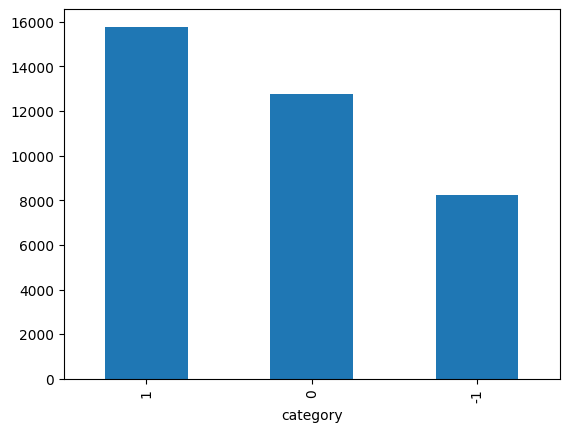

In [210]:
df['category'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

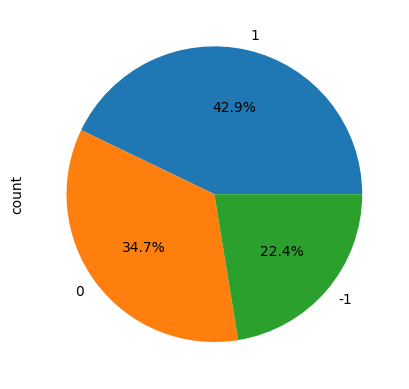

In [211]:
df['category'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [212]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

In [213]:
df[df['word_count'] == 1]['category'].value_counts()

category
 0    667
 1     76
-1     47
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

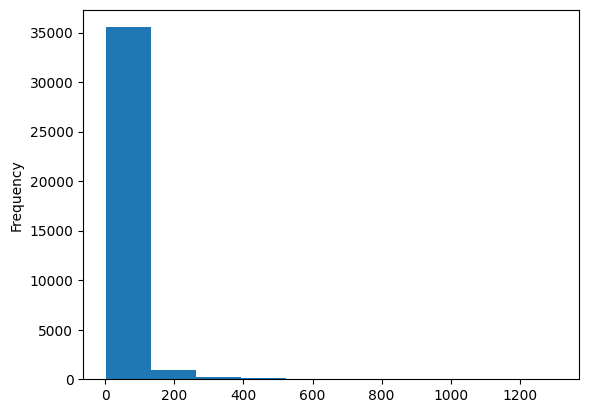

In [214]:
df['word_count'].plot(kind = 'hist',bins = 10)

<Axes: xlabel='word_count', ylabel='Density'>

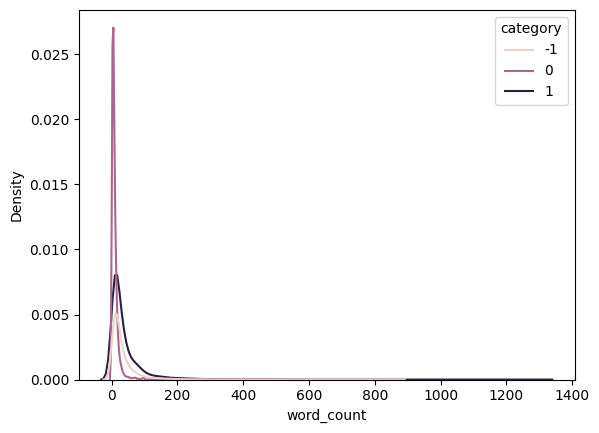

In [215]:
sns.kdeplot(data = df,x = 'word_count',hue = 'category', color = ['blue','yellow','black']
            )

In [216]:
from nltk.corpus import stopwords
df['clean_comment'].iloc[1]

'buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basically advocating that should rid ourselves material possessions fact distinctly remembered jesus making someone cry because that someone asked what achieve salvation and jesus replied with live like buddhist very very roughly translated also point out that buddha rare

In [217]:
df[df['clean_comment'].apply(lambda a: a in (stopwords.words(
'english'
)))]

,clean_comment,category,word_count
288,where,0,1
929,why,0,1
1176,what,0,1
4882,too,0,1
4940,did,0,1
5699,was,0,1
9353,there,0,1
10883,aren,0,1
14916,but,0,1
15743,what,0,1


In [218]:
# df['clean_comment'].loc[1].split().apply(lambda a: a in stopwords.words('engliash'))

In [219]:
stop_words = stopwords.words('english')
df['stop_word_count'] = df['clean_comment'].apply(lambda a: len([word for word in a.split() if word in stop_words]))

In [220]:
df.head()

,clean_comment,category,word_count,stop_word_count
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


In [221]:
df['stop_word_count'].describe()

count    36793.000000
mean         9.840078
std         19.381327
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        463.000000
Name: stop_word_count, dtype: float64

![alt text](354d2a02-edc5-44d0-9a0c-f2b8fc3f1ed7.png)

<Axes: xlabel='stop_word_count', ylabel='Density'>

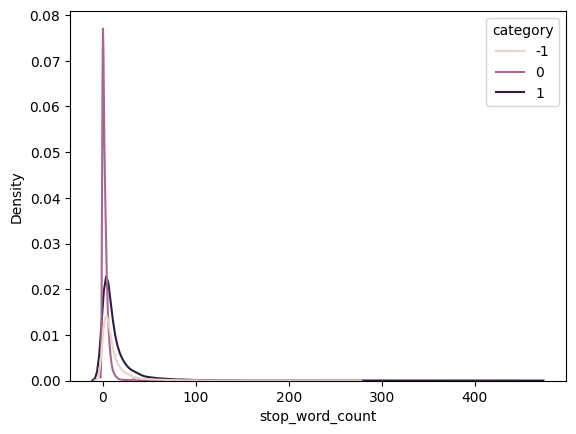

In [222]:
sns.kdeplot(data = df,x = 'stop_word_count',hue = 'category')

In [223]:
#count numer of character
df['clean_comment'].apply(len)

0         259
1        1268
2         459
3         167
4         690
         ... 
37244       5
37245      99
37246      36
37247       9
37248      37
Name: clean_comment, Length: 36793, dtype: int64

In [224]:
len(df['clean_comment'].loc[0])

259

In [225]:
df.head()

,clean_comment,category,word_count,stop_word_count
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45


In [226]:
# from collections import Counter
# val = Counter(z)
# new = pd.DataFrame({'key': val.keys(), 'value': val.values()})
# new

In [227]:
# (new.sort_values(by = 'value')).tail(100)

In [228]:
# val.keys()

In [229]:
#removal of stopwords
df['without_stopwords'] = df['clean_comment'].apply(lambda a: ' '.join([word for word in a.split() if word not in stop_words]))

In [230]:
# z = ''.join([word for word in df['without_stopword']])

In [231]:
import re

In [232]:
df['without_stopword'] = df['clean_comment'].apply(lambda a: re.sub(r'[^A-Za-z0-9\s!?.]','',str(a)))

In [233]:
df.head()

,clean_comment,category,word_count,stop_word_count,without_stopwords,without_stopword
0,family mormon have never tried explain them th...,1,39,13,family mormon never tried explain still stare ...,family mormon have never tried explain them th...
1,buddhism has very much lot compatible with chr...,1,196,59,buddhism much lot compatible christianity espe...,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...,-1,86,40,seriously say thing first get complex explain ...,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...,0,29,15,learned want teach different focus goal wrappi...,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...,1,112,45,benefit may want read living buddha living chr...,for your own benefit you may want read living ...


In [238]:
#lammatizing 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [245]:
print(lemmatizer.lemmatize('better'))

better


In [248]:
df.drop(['clean_comment','without_stopword'],axis = 1,inplace =True)

In [251]:
df['without_stopwords'].apply(lambda a: ' '.join([lemmatizer.lemmatize(word) for word in a.split() ]))

0        family mormon never tried explain still stare ...
1        buddhism much lot compatible christianity espe...
2        seriously say thing first get complex explain ...
3        learned want teach different focus goal wrappi...
4        benefit may want read living buddha living chr...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                           facebook working bjp’ cell
Name: without_stopwords, Length: 36793, dtype: object

In [252]:
df

,category,word_count,stop_word_count,without_stopwords
0,1,39,13,family mormon never tried explain still stare ...
1,1,196,59,buddhism much lot compatible christianity espe...
2,-1,86,40,seriously say thing first get complex explain ...
3,0,29,15,learned want teach different focus goal wrappi...
4,1,112,45,benefit may want read living buddha living chr...
...,...,...,...,...
37244,0,1,0,jesus
37245,1,19,0,kya bhai pure saal chutiya banaya modi aur jab...
37246,0,6,0,downvote karna tha par upvote hogaya
37247,1,2,0,haha nice


In [253]:
import mlflow

In [259]:
mlflow.set_tracking_uri('http://127.0.0.1:5000/')
mlflow.set_experiment('my_experiment')
with mlflow.start_run():
    mlflow.log_param('hlo',45)
    mlflow.log_metric('accuracy',70)

2025/11/26 16:36:12 INFO mlflow.tracking.fluent: Experiment with name 'my_experiment' does not exist. Creating a new experiment.


🏃 View run burly-bear-252 at: http://127.0.0.1:5000/#/experiments/976957515948483937/runs/18bc381179fd4989ae05a20e6338a447
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/976957515948483937


In [256]:
mlflow

<module 'mlflow' from 'c:\\Users\\Personal PC\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\mlflow\\__init__.py'>